<a href="https://colab.research.google.com/github/hirotakaster/imagesearch/blob/main/OpenCV_feature__algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenCVのインストール
SIFT/OpenCVを利用するため関係パッケージをインストールする

In [1]:
!pip install opencv-python==4.4.0.46
!pip install opencv-contrib-python==4.4.0.46
!git clone https://github.com/hirotakaster/imagesearch

## for SURF(SURFを利用する場合、このバージョンを利用する)
#!pip install opencv-python==3.4.2.17
#!pip install opencv-contrib-python==3.4.2.17

     |████████████████████████████████| 49.5 MB 178 kB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 55.7 MB 1.2 MB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30
Cloning into 'imagesearch'...
remote: Enumerating objects: 155, done.
remote: Counting objects: 100% (155/155), done.
remote: Compressing objects: 100% (154/154), done.
remote: Total 155 (delta 8),

## Utility関係の関数 

In [2]:
import cv2
import matplotlib.pyplot as plt
import re

def show_image_files(images, figsize=(20,10), columns = 5):
  plt.figure(figsize=figsize)
  for i, f in enumerate(images):
      plt.subplot(len(images) / columns + 1, columns, i + 1)
      plt.imshow(cv2.cvtColor(cv2.imread(f), cv2.COLOR_BGR2RGB))


## SIFTで２画像間のマッチング生成例


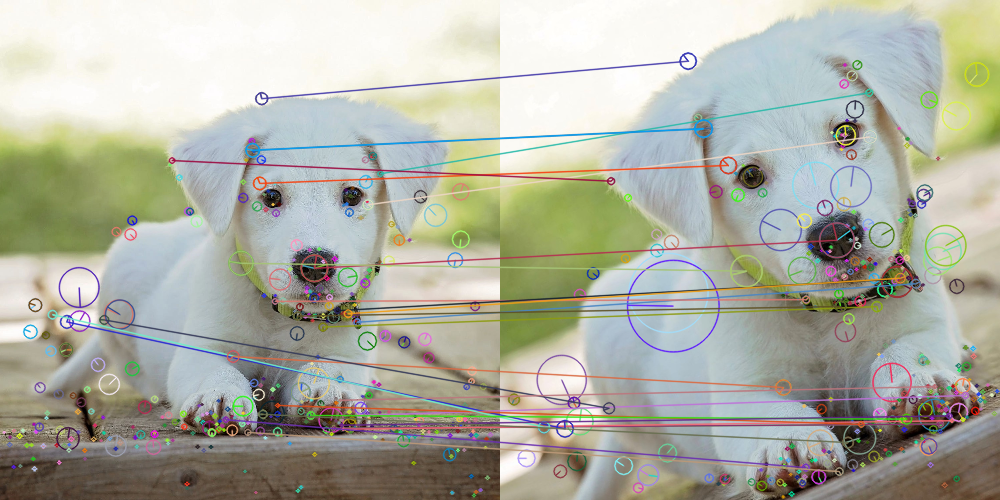

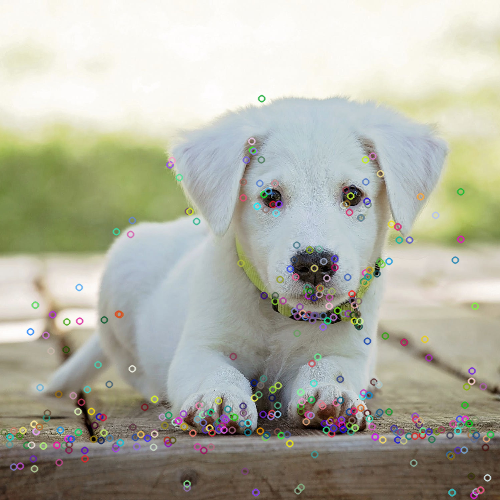

In [3]:
from google.colab.patches import cv2_imshow

IMG_SIZE = (500, 500)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
detector = cv2.SIFT_create ()
# detector = cv2.ORB_create()
#detector = cv2.AKAZE_create()
#detector = cv2.xfeatures2d.SURF_create()

base_img = cv2.imread('imagesearch/data/test/008.jpeg')
rot_base_img = cv2.imread('imagesearch/data/test/008_rotation.jpeg')
target_gray = cv2.cvtColor(base_img, cv2.COLOR_BGR2GRAY)
rot_gray = cv2.cvtColor(rot_base_img, cv2.COLOR_BGR2GRAY)

target_img = cv2.resize(target_gray, IMG_SIZE)
rot_img = cv2.resize(rot_gray, IMG_SIZE)
(target_kp, target_des) = detector.detectAndCompute(target_img, None)
(rot_kp, rot_des) = detector.detectAndCompute(rot_img, None)

matches = bf.match(target_des, rot_des)
matches = sorted(matches, key=lambda x: x.distance)

# 2画像間のマッチング結果画像を作成
img1_2 = cv2.drawMatches(cv2.resize(base_img, IMG_SIZE), target_kp, cv2.resize(rot_base_img, IMG_SIZE), rot_kp, matches[:30], None, flags=4)
cv2_imshow(img1_2)

img_sift = cv2.drawKeypoints(cv2.resize(base_img, IMG_SIZE), target_kp, None, flags=0)
cv2_imshow(cv2.resize(img_sift, (IMG_SIZE)))
